In [1]:
## 生成一些简单的样本数据，test_prei 代表第i个模型的预测值
test_pre1 = [1.2, 3.2, 2.1, 6.2]
test_pre2 = [0.9, 3.1, 2.0, 5.9]
test_pre3 = [1.1, 2.9, 2.2, 6.0]
# y_test_true 代表第模型的真实值
y_test_true = [1, 3, 2, 6]

In [8]:
import numpy as np
import pandas as pd

def Weight_method(test_pre1,test_pre2,test_pre3,w=[1/3,1/3,1/3]):
    Weight_result=w[0]*pd.Series(test_pre1)+w[1]*pd.Series(test_pre2)+w[2]*pd.Series(test_pre3)
    return Weight_result

In [4]:
from sklearn import metrics

print('Pred1 MAE:',metrics.mean_absolute_error(y_test_true, test_pre1))
print('Pred2 MAE:',metrics.mean_absolute_error(y_test_true, test_pre2))
print('Pred3 MAE:',metrics.mean_absolute_error(y_test_true, test_pre3))

Pred1 MAE: 0.1750000000000001
Pred2 MAE: 0.07499999999999993
Pred3 MAE: 0.10000000000000009


In [10]:
w=[0.3,0.4,0.3]
Weight_pre = Weight_method(test_pre1,test_pre2,test_pre3,w)
print('Weight_method MAE:',metrics.mean_absolute_error(y_test_true, Weight_pre))

Weight_method MAE: 0.05750000000000027


In [11]:
#Stackong融合
from sklearn import linear_model

def Stacking_method(train_reg1,train_reg2,train_reg3,y_train_true,test_pre1,test_pre2,test_pre3,model_L2= linear_model.LinearRegression()):
    model_L2.fit(pd.concat([pd.Series(train_reg1),pd.Series(train_reg2),pd.Series(train_reg3)],axis=1).values,y_train_true)
    Stacking_result = model_L2.predict(pd.concat([pd.Series(test_pre1),pd.Series(test_pre2),pd.Series(test_pre3)],axis=1).values)
    return Stacking_result

In [12]:
## 生成一些简单的样本数据，test_prei 代表第i个模型的预测值
train_reg1 = [3.2, 8.2, 9.1, 5.2]
train_reg2 = [2.9, 8.1, 9.0, 4.9]
train_reg3 = [3.1, 7.9, 9.2, 5.0]
# y_test_true 代表第模型的真实值
y_train_true = [3, 8, 9, 5]
test_pre1 = [1.2, 3.2, 2.1, 6.2]
test_pre2 = [0.9, 3.1, 2.0, 5.9]
test_pre3 = [1.1, 2.9, 2.2, 6.0]
# y_test_true 代表第模型的真实值
y_test_true = [1, 3, 2, 6]

In [13]:
model_L2= linear_model.LinearRegression()
Stacking_pre = Stacking_method(train_reg1,train_reg2,train_reg3,y_train_true,
                                test_pre1,test_pre2,test_pre3,model_L2)
print('Stacking_pre MAE:',metrics.mean_absolute_error(y_test_true, Stacking_pre))

Stacking_pre MAE: 0.042134831460675204


In [14]:
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [16]:
#Voting投票机制,少数服从多数
iris=datasets.load_iris()

x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

clf1=XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=3, min_child_weight=2, subsample=0.7,
                     colsample_bytree=0.6, objective='binary:logistic')
clf2=RandomForestClassifier(n_estimators=50,max_depth=1,min_samples_split=4,
                           min_samples_leaf=63,oob_score=True)
clf3=SVC(C=0.1)

eclf = VotingClassifier(estimators=[('xgb',clf1),('rf',clf2),('svc',clf3)],voting='hard')
for clf,label in zip([clf1,clf2,clf3,eclf],['XGBBoosting','Random Forest','SVM','Ensemble']):
    scores = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.02) [XGBBoosting]
Accuracy: 0.33 (+/- 0.00) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [SVM]
Accuracy: 0.92 (+/- 0.02) [Ensemble]


In [17]:
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

clf1 = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=3, min_child_weight=2, subsample=0.8,
                     colsample_bytree=0.8, objective='binary:logistic')
clf2 = RandomForestClassifier(n_estimators=50, max_depth=1, min_samples_split=4,
                              min_samples_leaf=63,oob_score=True)
clf3 = SVC(C=0.1, probability=True)

# 软投票
eclf = VotingClassifier(estimators=[('xgb', clf1), ('rf', clf2), ('svc', clf3)], voting='soft', weights=[2, 1, 1])
clf1.fit(x_train, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['XGBBoosting', 'Random Forest', 'SVM', 'Ensemble']):
    scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.02) [XGBBoosting]
Accuracy: 0.33 (+/- 0.00) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [SVM]
Accuracy: 0.96 (+/- 0.02) [Ensemble]


In [18]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Native Bayes]
Accuracy: 0.95 (+/- 0.02) [Stacking Classifer]


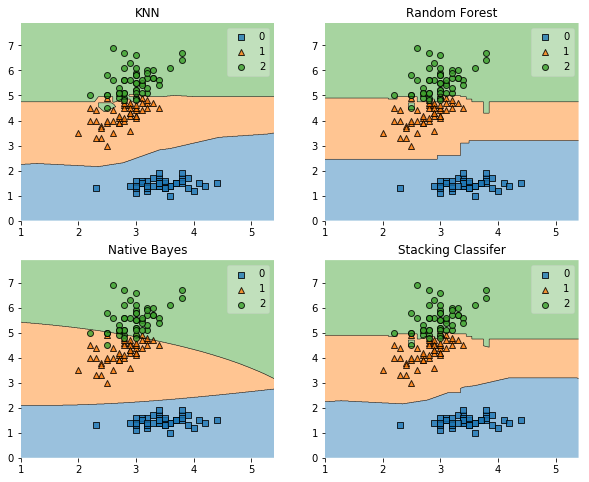

In [20]:
iris  = datasets.load_iris()
X,y = iris.data[:,1:3],iris.target

clf1=KNeighborsClassifier(n_neighbors=1)
clf2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()
lr=LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3],
                         meta_classifier=lr)

label = ['KNN','Random Forest','Native Bayes','Stacking Classifer']
clf_list=[clf1,clf2,clf3,sclf]

fig = plt.figure(figsize=(10,8))
gs=gridspec.GridSpec(2,2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean=[]
clf_cv_std=[]
for clf,label,grd in zip(clf_list,label,grid):
    
    scores =cross_val_score(clf,X,y,cv=3,scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
    
    clf.fit(X,y)
    ax=plt.subplot(gs[grd[0],grd[1]])
    fig=plot_decision_regions(X=X,y=y,clf=clf)
    plt.title(label)
    
plt.show()

In [29]:
def def Ensemble_add_feature(train,test,target,clfs):
    # n_flods = 5
    # skf = list(StratifiedKFold(y, n_folds=n_flods))
    train_ = np.zeros((train.shape[0],len(clfs*2)))
    test_ = np.zeros((test.shape[0],len(clfs*2)))
    for j,clf in enumerate(clfs):
        '''依次训练各个单模型'''
        # print(j, clf)
        '''使用第1个部分作为预测，第2部分来训练模型，获得其预测的输出作为第2部分的新特征。'''
        # X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(train,target)
        y_train = clf.predict(train)
        y_test = clf.predict(test)
        ## 新特征生成
        train_[:,j*2] = y_train**2
        test_[:,j*2] = y_test**2
        train_[:, j+1] = np.exp(y_train)
        test_[:, j+1] = np.exp(y_test)
        # print("val auc Score: %f" % r2_score(y_predict, dataset_d2[:, j]))
        print('Method ',j)
    train_ = pd.DataFrame(train_)
    test_ = pd.DataFrame(test_)
    return train_,test_

SyntaxError: invalid syntax (<ipython-input-29-860854b4df62>, line 1)

In [30]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
data_0 = iris.data
data = data_0[:100,:]
target_0 = iris.target
target = target_0[:100]
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3)
x_train = pd.DataFrame(x_train) ; x_test = pd.DataFrame(x_test)
#模型融合中使用到的各个单模型
clfs = [LogisticRegression(),
RandomForestClassifier(n_estimators=5, n_jobs=-1, criterion='gini'),
ExtraTreesClassifier(n_estimators=5, n_jobs=-1, criterion='gini'),
ExtraTreesClassifier(n_estimators=5, n_jobs=-1, criterion='entropy'),
GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=5)]
New_train,New_test = Ensemble_add_feature(x_train,x_test,y_train,clfs)
clf = LogisticRegression()
# clf = GradientBoostingClassifier(learning_rate=0.02, subsample=0.5, max_depth=6, n_estimators=30)
clf.fit(New_train, y_train)
y_emb = clf.predict_proba(New_test)[:, 1]
print("Val auc Score of stacking: %f" % (roc_auc_score(y_test, y_emb)))

Method  0
Method  1
Method  2
Method  3
Method  4
Val auc Score of stacking: 1.000000


In [1]:
#比赛用数据示例
import pandas as pd
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
# from mlxtend.plotting import plot_learning_curves
# from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
## 数据读取
Train_data = pd.read_csv('./data/used_car_train_20200313.csv', sep=' ')
TestA_data = pd.read_csv('./data/used_car_testA_20200313.csv', sep=' ')
print(Train_data.shape)
print(TestA_data.shape)

(150000, 31)
(50000, 30)


In [5]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [6]:
numerical_cols = Train_data.select_dtypes(exclude = 'object').columns
print(numerical_cols)

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')


In [7]:
feature_cols = [col for col in numerical_cols if col not in ['SaleID','name','regDate','price']]

In [9]:
X_data=Train_data[feature_cols]
Y_data=Train_data['price']

X_test = TestA_data[feature_cols]

print('X train shape:',X_data.shape)
print('X test shape:',X_test.shape)

X train shape: (150000, 26)
X test shape: (50000, 26)


In [10]:
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))

In [11]:
print('Sta of label:')
Sta_inf(Y_data)

Sta of label:
_min 11
_max: 99999
_mean 5923.327333333334
_ptp 99988
_std 7501.973469876438
_var 56279605.94272992


In [12]:
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

In [22]:
def build_model_lr(x_train,y_train):
    reg_model = linear_model.LinearRegression()
    reg_model.fit(x_train,y_train)
    return reg_model

def build_model_ridge(x_train,y_train):
    reg_model = linear_model.Ridge(alpha=0.8)
    reg_model.fit(x_train,y_train)
    return reg_model

def build_model_lasso(x_train,y_train):
    reg_model = linear_model.LassoCV()
    reg_model.fit(x_train,y_train)
    return reg_model

def build_model_gbdt(x_train,y_train):
    estimator =GradientBoostingRegressor(loss='ls',subsample= 0.85,max_depth= 5,n_estimators = 100)
#     estimator = GradientBoostingRegressor(loss='ls',subsample==0.85,max_depth=5,n_estimators=100)
    param_grid = {
        'learning_rate':[0.05,0.08,0.1,0.2],
    }
    gbdt = GridSearchCV(estimator,param_grid,cv=3)
    gbdt.fit(x_train,y_train)
    print(gbdt.best_params_)
    
    return gbdt

def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=120,learning_rate=0.08,gamma=0,subsample=0.8,
                            colsample_bytree=0.9,max_depth=5)
    model.fit(x_train,y_train)
    return model

def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=63,n_estimators=100)
    param_grid = {
        'learning_rate':[0.01,0.05,0.1],
    }
    gbm=GridSearchCV(estimator,param_grid)
    gbm.fit(x_train,y_train)
    return gbm


In [17]:
xgr =xgb.XGBRegressor(n_estimators=120,learning_rate=0.1,subsample=0.8,
                     colsample_bytree=0.9,max_depth=7)
scores_train = []
scores = []

sk = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data,Y_data):
    train_x = X_data.iloc[train_ind].values
    train_y = Y_data.iloc[train_ind]
    val_x=X_data.iloc[val_ind].values
    val_y=Y_data.iloc[val_ind]
    
    xgr.fit(train_x,train_y)
    pred_train_xgb = xgr.predict(train_x)
    pred_xgb=xgr.predict(val_x)
    
    score_train = mean_absolute_error(train_y,pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)
    
print('Train mae:',np.mean(score_train))
print('Val mae',np.mean(scores))

Train mae: 595.0579556878358
Val mae 690.3318059398266


In [19]:
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)

print('Predict LR...')
model_lr = build_model_lr(x_train,y_train)
val_lr =model_lr.predict(x_val)
subA_lr = model_lr.predict(X_test)

print('Predict Ridge...')
model_ridge = build_model_ridge(x_train,y_train)
val_ridge = model_ridge.predict(x_val)
subA_ridge = model_ridge.predict(X_test)

print('Predict Lasso...')
model_lasso = build_model_lasso(x_train,y_train)
val_lasso = model_lasso.predict(x_val)
subA_lasso = model_lasso.predict(X_test)

print('Predict GBDT...')
model_gbdt = build_model_gbdt(x_train,y_train)
val_gbdt = model_gbdt.predict(x_val)
subA_gbdt = model_gbdt.predict(X_test)

Predict LR...
Predict Ridge...
Predict Lasso...
Predict GBDT...
{'learning_rate': 0.2}


In [23]:
print('predict XGB...')
model_xgb=build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
subA_xgb = model_xgb.predict(X_test)

print('predict lgb...')
model_lgb=build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
subA_lgb = model_lgb.predict(X_test)

predict XGB...
predict lgb...


In [25]:
print('Sta inf of lgb:')
Sta_inf(subA_lgb)

Sta inf of lgb:
_min -209.9117583569396
_max: 88893.62281896365
_mean 5920.558272379161
_ptp 89103.53457732059
_std 7358.677218550228
_var 54150130.40681012


In [26]:
#加权融合
def Weighted_method(test_pre1,test_pre2,test_pre3,w=[1/3,1/3,1/3]):
    Weighted_result = w[0]*pd.Series(test_pre1)+w[1]*pd.Series(test_pre2)+w[2]*pd.Series(test_pre3)
    return Weighted_result

## Init the Weight
w = [0.3,0.4,0.3]

## 测试验证集准确度
val_pre = Weighted_method(val_lgb,val_xgb,val_gbdt,w)
MAE_Weighted = mean_absolute_error(y_val,val_pre)
print('MAE of Weighted of val:',MAE_Weighted)
## 预测数据部分
subA = Weighted_method(subA_lgb,subA_xgb,subA_gbdt,w)
print('Sta inf:')
Sta_inf(subA)
## 生成提交文件
sub = pd.DataFrame()
sub['SaleID'] = X_test.index
sub['price'] = subA
sub.to_csv('./sub_Weighted.csv',index=False)

MAE of Weighted of val: 723.1740209513815
Sta inf:
_min -2131.830319983806
_max: 88217.92757131893
_mean 5923.7546057814025
_ptp 90349.75789130274
_std 7339.031994419382
_var 53861390.61511132


In [27]:
## 与简单的LR（线性回归）进行对比
val_lr_pred = model_lr.predict(x_val)
MAE_lr = mean_absolute_error(y_val,val_lr_pred)
print('MAE of lr:',MAE_lr)

MAE of lr: 2598.694596250407


In [28]:
## Starking
## 第一层
train_lgb_pred = model_lgb.predict(x_train)
train_xgb_pred = model_xgb.predict(x_train)
train_gbdt_pred = model_gbdt.predict(x_train)
Strak_X_train = pd.DataFrame()
Strak_X_train['Method_1'] = train_lgb_pred
Strak_X_train['Method_2'] = train_xgb_pred
Strak_X_train['Method_3'] = train_gbdt_pred
Strak_X_val = pd.DataFrame()
Strak_X_val['Method_1'] = val_lgb
Strak_X_val['Method_2'] = val_xgb
Strak_X_val['Method_3'] = val_gbdt
Strak_X_test = pd.DataFrame()
Strak_X_test['Method_1'] = subA_lgb
Strak_X_test['Method_2'] = subA_xgb
Strak_X_test['Method_3'] = subA_gbdt

In [29]:
Strak_X_test.head()

,Method_1,Method_2,Method_3
0,35951.447624,39728.742188,37880.751859
1,299.343213,288.691772,160.227863
2,6792.774380,7663.454590,7620.933186
3,11972.771852,11935.142578,11379.311005
4,552.704947,560.488770,489.415794


In [30]:
## level2-method
model_lr_Stacking = build_model_lr(Strak_X_train,y_train)
## 训练集
train_pre_Stacking = model_lr_Stacking.predict(Strak_X_train)
print('MAE of Stacking-LR:',mean_absolute_error(y_train,train_pre_Stacking))
## 验证集
val_pre_Stacking = model_lr_Stacking.predict(Strak_X_val)
print('MAE of Stacking-LR:',mean_absolute_error(y_val,val_pre_Stacking))
## 预测集
print('Predict Stacking-LR...')
subA_Stacking = model_lr_Stacking.predict(Strak_X_test)

MAE of Stacking-LR: 638.3281921797087
MAE of Stacking-LR: 719.936302930018
Predict Stacking-LR...


In [31]:
subA_Stacking[subA_Stacking<10]=10 ## 去除过小的预测值
sub = pd.DataFrame()
sub['SaleID'] = X_test.index
sub['price'] = subA_Stacking
sub.to_csv('./sub_Stacking.csv',index=False)

In [32]:
print('Sta inf:')
Sta_inf(subA_Stacking)

Sta inf:
_min 10.0
_max: 89772.72939700309
_mean 5918.253091091468
_ptp 89762.72939700309
_std 7386.402996225031
_var 54558949.22264211
